# Setup

In [ ]:
!pip install pycaret pandas shap

In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import datetime as dt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/crime_type_per_month_msoa_with_force_si_future.csv')

In [ ]:
df = df[df['MSOA code'] == 'E02000001']

In [ ]:
df['Month'] = pd.to_datetime(df['Month'],format= '%Y-%m', exact = False)

In [ ]:
df.head()

,Unnamed: 0,Month,MSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,Sum crimes,Police force,stringency_index
0,0,2015-01-01,E02000001,102.0,18.0,13.0,21.0,49.0,13.0,142.0,2.0,18.0,7.0,53.0,48.0,12.0,76.0,574.0,City of London,0.0
7201,7201,2015-02-01,E02000001,91.0,22.0,22.0,22.0,21.0,14.0,141.0,1.0,31.0,1.0,67.0,47.0,10.0,77.0,567.0,City of London,0.0
14402,14402,2015-03-01,E02000001,96.0,25.0,22.0,14.0,25.0,16.0,168.0,5.0,29.0,2.0,57.0,54.0,8.0,91.0,612.0,City of London,0.0
21603,21603,2015-04-01,E02000001,73.0,34.0,33.0,18.0,41.0,10.0,125.0,5.0,25.0,6.0,74.0,65.0,8.0,88.0,605.0,City of London,0.0
28804,28804,2015-05-01,E02000001,81.0,24.0,29.0,13.0,27.0,15.0,129.0,1.0,30.0,5.0,78.0,56.0,17.0,78.0,583.0,City of London,0.0


In [ ]:
#df['Year'] = df['Month'].dt.year
#df['Month'] = df['Month'].dt.month
df = df[['Month', 'MSOA code', 'Sum crimes',
       'stringency_index']]

In [ ]:
df = df.dropna(subset=['Sum crimes'])

In [ ]:
df.head()

,Month,MSOA code,Sum crimes,stringency_index
0,2015-01-01,E02000001,574.0,0.0
7201,2015-02-01,E02000001,567.0,0.0
14402,2015-03-01,E02000001,612.0,0.0
21603,2015-04-01,E02000001,605.0,0.0
28804,2015-05-01,E02000001,583.0,0.0


In [ ]:
df1 = df[df['stringency_index'] == 0]
df1['stringency_index'] = "No Lockdown"
df2 = df[df['stringency_index'] > 0]
df2 = df2[df['stringency_index'] < 50]
df2['stringency_index'] = "Medium Lockdown"
df3 = df[df['stringency_index'] > 50]
df3['stringency_index'] = "Hard Lockdown"
df = pd.DataFrame()
df = df.append(df1)
df = df.append(df2)
df = df.append(df3)


In [ ]:
df = df.reset_index(drop=True)
#df = df[:82]


,Month,MSOA code,Sum crimes,stringency_index
74,2020-11-01,E02000001,500.0,Hard Lockdown
75,2020-12-01,E02000001,426.0,Hard Lockdown
76,2021-01-01,E02000001,287.0,Hard Lockdown
77,2021-02-01,E02000001,274.0,Hard Lockdown
78,2021-03-01,E02000001,385.0,Hard Lockdown
79,2021-04-01,E02000001,398.0,Hard Lockdown
80,2021-05-01,E02000001,468.0,Hard Lockdown
81,2021-06-01,E02000001,637.0,Hard Lockdown


In [ ]:
#data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
#data_unseen = df.drop(data.index).reset_index(drop=True)
#data = df[:74]
data_unseen = df[74:]

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (74, 3)
Unseen Data For Predictions: (8, 4)


In [ ]:
df1 = data
df1['date'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['date'].dt.month
seasons = {'Seasons':['Winter', 'Winter', 'Winter', \
                      'Spring', 'Spring', 'Spring', \
                      'Summer', 'Summer', 'Summer', \
                      'Autumn', 'Autumn', 'Autumn'],
        'month':[12, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11]}
df_season = pd.DataFrame(seasons)
data=pd.merge(df1, df_season, on=['month'], how='inner')

In [ ]:
df2 = data_unseen
df2['date'] = pd.to_datetime(df1['Month'])
df2['month'] = df2['date'].dt.month
seasons = {'Seasons':['Winter', 'Winter', 'Winter', \
                      'Spring', 'Spring', 'Spring', \
                      'Summer', 'Summer', 'Summer', \
                      'Autumn', 'Autumn', 'Autumn'],
        'month':[12, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11]}
df_season = pd.DataFrame(seasons)
data_unseen=pd.merge(df2, df_season, on=['month'], how='inner')

# Pycaret Regression Module

In [ ]:
data = data[['Month', 'stringency_index', 'Sum crimes']]

In [ ]:
data_unseen = data_unseen[['Month', 'stringency_index','Sum crimes']]

In [ ]:
exp_reg101 = setup(data = data, target = 'Sum crimes') 

,Description,Value
0,session_id,8192
1,Target,Sum crimes
2,Original Data,"(74, 3)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(51, 24)"


In [ ]:
best_model = compare_models(sort="MAE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,133.3439,27472.7634,160.4340,-0.6741,0.2415,0.2187,0.047
dummy,Dummy Regressor,133.3439,27472.7625,160.4340,-0.6741,0.2415,0.2187,0.010
en,Elastic Net,133.6357,27186.5650,160.1600,-0.6430,0.2410,0.2177,0.012
omp,Orthogonal Matching Pursuit,134.8715,25973.1780,157.3894,-0.5904,0.2356,0.2116,0.011
br,Bayesian Ridge,135.4953,28415.1112,163.7415,-0.7152,0.2464,0.2225,0.018
llar,Lasso Least Angle Regression,135.7305,27683.1597,163.4460,-0.7477,0.2416,0.2123,0.013
knn,K Neighbors Regressor,139.1593,30735.1313,168.8455,-0.8401,0.2558,0.2317,0.061
ada,AdaBoost Regressor,139.4515,30718.4140,169.9090,-0.7968,0.2508,0.2236,0.049
ridge,Ridge Regression,142.8748,30532.3192,172.0474,-0.9593,0.2536,0.2232,0.011
rf,Random Forest Regressor,142.9435,29597.0877,168.2703,-0.7899,0.2493,0.2265,0.404


In [ ]:
omp = create_model('lightgbm')
br = omp

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,136.8741,25661.1798,160.1911,-0.0025,0.2356,0.2109
1,80.1739,7885.4344,88.8000,-0.0188,0.1280,0.1155
2,93.7174,13292.7967,115.2944,-0.2782,0.1819,0.1584
3,173.0261,32668.2692,180.7437,-0.1042,0.2558,0.2429
4,105.4217,14537.1831,120.5702,-3.2464,0.1565,0.1264
5,163.7957,35700.7324,188.9464,-0.0272,0.2526,0.2352
6,139.3435,38595.7494,196.4580,-0.1329,0.2417,0.1682
7,161.7739,55830.2389,236.2842,-0.8824,0.5189,0.5215
8,136.9435,21428.0398,146.3832,-1.3784,0.2323,0.2420


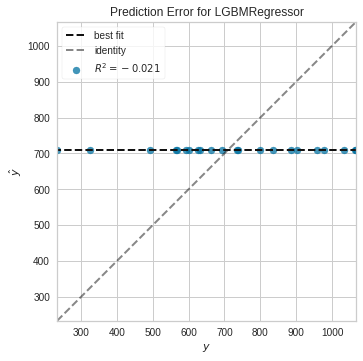

In [ ]:
plot_model(br, plot = 'error')

In [ ]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
tuned_br = tune_model(br)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,136.8741,25661.1798,160.1911,-0.0025,0.2356,0.2109
1,80.1739,7885.4344,88.8000,-0.0188,0.1280,0.1155
2,93.7174,13292.7967,115.2944,-0.2782,0.1819,0.1584
3,173.0261,32668.2692,180.7437,-0.1042,0.2558,0.2429
4,105.4217,14537.1831,120.5702,-3.2464,0.1565,0.1264
5,163.7957,35700.7324,188.9464,-0.0272,0.2526,0.2352
6,139.3435,38595.7494,196.4580,-0.1329,0.2417,0.1682
7,161.7739,55830.2389,236.2842,-0.8824,0.5189,0.5215
8,136.9435,21428.0398,146.3832,-1.3784,0.2323,0.2420


In [ ]:
final_br= finalize_model(tuned_br)

In [ ]:
print(final_br)

LGBMRegressor(bagging_fraction=0.4, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.0001, max_depth=-1,
              min_child_samples=100, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=120, n_jobs=-1, num_leaves=30, objective=None,
              random_state=8192, reg_alpha=1e-07, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
data_unseen

,Month,stringency_index,Sum crimes


In [ ]:
unseen_predictions = predict_model(final_br, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,296.7601,100130.9372,316.4347,-7.2997,0.6226,0.8234


,Month,MSOA code,Sum crimes,stringency_index,Label
74,2020-11-01,E02000001,500.0,Hard Lockdown,718.635135
75,2020-12-01,E02000001,426.0,Hard Lockdown,718.635135
76,2021-01-01,E02000001,287.0,Hard Lockdown,718.635135
77,2021-02-01,E02000001,274.0,Hard Lockdown,718.635135
78,2021-03-01,E02000001,385.0,Hard Lockdown,718.635135
79,2021-04-01,E02000001,398.0,Hard Lockdown,718.635135
80,2021-05-01,E02000001,468.0,Hard Lockdown,718.635135
81,2021-06-01,E02000001,637.0,Hard Lockdown,718.635135


In [ ]:
sum(abs(unseen_predictions['Sum crimes'] - unseen_predictions['Label']))/len(unseen_predictions['Label'])

76.12358093261719

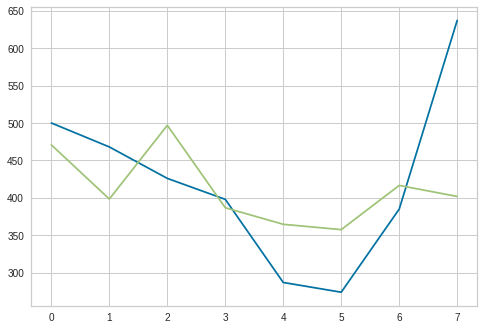

In [ ]:
import matplotlib.pyplot as plt
plt.plot(unseen_predictions[['Sum crimes', 'Label']])

# Pycaret Timeseries Module

In [ ]:
!pip install pycaret-ts-alpha

In [ ]:
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()

In [ ]:
ny_df=df.set_index('Month')

In [ ]:
ny_df_monthly=ny_df.resample('M').mean()

In [ ]:
ny_df_monthly.head()

,Sum crimes
Month,
2015-01-31,574.0
2015-02-28,567.0
2015-03-31,612.0
2015-04-30,605.0
2015-05-31,583.0


In [ ]:
exp.setup(ny_df_monthly, fh = 12, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sum crimes
2,Original Data,"(82, 1)"
3,Missing Values,False
4,Approach,Univariate
5,Exogenous Variables,Not Present
6,Transformed Train Target,"(70,)"
7,Transformed Test Target,"(12,)"
8,Transformed Train Exogenous,"(70, 0)"
9,Transformed Test Exogenous,"(12, 0)"


In [ ]:
exp.plot_model(plot = 'ts')

In [ ]:
exp.plot_model(plot = 'diagnostics')

In [ ]:
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
naive,Naive Forecaster,188.1111,226.4026,0.4358,0.2427,2.7494,2.6414,-0.8532,0.9467
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,182.0515,219.2822,0.4105,0.2454,2.6759,2.5696,-1.2981,0.0900
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,180.7435,215.2988,0.3857,0.2455,2.662,2.533,-1.3625,0.0300
ets,ETS,193.366,230.291,0.4439,0.247,2.8247,2.6857,-0.8851,0.0367
exp_smooth,Exponential Smoothing,193.6342,230.5816,0.4443,0.2472,2.8287,2.6891,-0.8905,0.0233
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,195.1267,234.042,0.4475,0.2501,2.8536,2.732,-1.1299,0.8433
theta,Theta Forecaster,193.9335,231.6098,0.4362,0.2504,2.8397,2.708,-1.0758,0.0367
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,188.0347,229.8882,0.4113,0.2509,2.7656,2.7003,-1.5046,1.0067
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,191.5736,230.0805,0.4224,0.2519,2.8133,2.6973,-1.3397,0.0333
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,191.5643,229.8668,0.4212,0.2522,2.8137,2.6954,-1.345,0.0300


In [ ]:
exp.plot_model(best, plot = 'forecast')

In [ ]:
prophet = exp.create_model('naive')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2017-10,47.0000,54.7905,0.0594,0.0596,0.7326,0.6779,-0.0227
1,2018-10,96.0833,114.8140,0.0984,0.1029,1.4583,1.4084,-0.4880
2,2019-10,421.2500,509.6032,1.1495,0.5655,6.0573,5.8379,-2.0488
Mean,NaT,188.1111,226.4026,0.4358,0.2427,2.7494,2.6414,-0.8532
SD,NaT,166.0675,201.7468,0.5049,0.2289,2.3577,2.2799,0.8665


NaiveForecaster(sp=1, strategy='last', window_length=None)


In [ ]:
#Model Tuning
tuned_prophet = exp.tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2017-10,47.0000,54.7905,0.0594,0.0596,0.7326,0.6779,-0.0227
1,2018-10,96.0833,114.8140,0.0984,0.1029,1.4583,1.4084,-0.4880
2,2019-10,421.2500,509.6032,1.1495,0.5655,6.0573,5.8379,-2.0488
Mean,NaT,188.1111,226.4026,0.4358,0.2427,2.7494,2.6414,-0.8532
SD,NaT,166.0675,201.7468,0.5049,0.2289,2.3577,2.2799,0.8665


NaiveForecaster(sp=1, strategy='last', window_length=None)


In [ ]:
final_best = exp.finalize_model(best)# generate predictions
exp.predict_model(final_best, fh = 12)

2021-11    902.0
2021-12    902.0
2022-01    902.0
2022-02    902.0
2022-03    902.0
2022-04    902.0
2022-05    902.0
2022-06    902.0
2022-07    902.0
2022-08    902.0
2022-09    902.0
2022-10    902.0
Freq: M, Name: Sum crimes, dtype: float64

# Pycaret Regression + Timeseries

In [ ]:
data.head()

,Month,MSOA code,Sum crimes,stringency_index
0,2019-03-01,E02000001,1034.0,No Lockdown
1,2020-12-01,E02000001,426.0,Hard Lockdown
2,2016-02-01,E02000001,476.0,No Lockdown
3,2020-05-01,E02000001,236.0,Hard Lockdown
4,2017-05-01,E02000001,583.0,No Lockdown


In [ ]:
df.head()

,Month,MSOA code,Sum crimes,stringency_index
0,2015-01-01,E02000001,574.0,No Lockdown
1,2015-02-01,E02000001,567.0,No Lockdown
2,2015-03-01,E02000001,612.0,No Lockdown
3,2015-04-01,E02000001,605.0,No Lockdown
4,2015-05-01,E02000001,583.0,No Lockdown


In [ ]:
df1 = data
df1['date'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['date'].dt.month
seasons = {'Seasons':['Winter', 'Winter', 'Winter', \
                      'Spring', 'Spring', 'Spring', \
                      'Summer', 'Summer', 'Summer', \
                      'Autumn', 'Autumn', 'Autumn'],
        'month':[12, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 11]}
df_season = pd.DataFrame(seasons)
df_season

,Seasons,month
0,Winter,12
1,Winter,1
2,Winter,2
3,Spring,3
4,Spring,4
5,Spring,5
6,Summer,6
7,Summer,7
8,Summer,8
9,Autumn,9


In [ ]:
data=pd.merge(df1, df_season, on=['month'], how='inner')

In [ ]:
data.head()

,Month,MSOA code,Sum crimes,stringency_index,date,month,Seasons
0,2019-03-01,E02000001,1034.0,No Lockdown,2019-03-01,3,Spring
1,2018-03-01,E02000001,836.0,No Lockdown,2018-03-01,3,Spring
2,2021-03-01,E02000001,385.0,Hard Lockdown,2021-03-01,3,Spring
3,2015-03-01,E02000001,612.0,No Lockdown,2015-03-01,3,Spring
4,2016-03-01,E02000001,491.0,No Lockdown,2016-03-01,3,Spring


In [ ]:
data_unseen = data
data_unseen['date'] = pd.to_datetime(data_unseen['Month'])
data_unseen['month'] = data_unseen['date'].dt.month
data_unseen=pd.merge(data_unseen, df_season, on=['month'], how='inner')

In [ ]:
data_unseen['Seasons'] = data_unseen['Seasons_x']

In [ ]:
# initialize setup
s = setup(data = data[['Month', 'Sum crimes', 'stringency_index', 'Seasons']], target = 'Sum crimes', 
          fold_strategy = 'timeseries', categorical_features = ['Seasons', 'stringency_index'], 
          fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Sum crimes
2,Original Data,"(74, 4)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(51, 28)"


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,153.0575,33973.6574,180.2241,0.0827,0.2732,0.2593,0.2467
omp,Orthogonal Matching Pursuit,155.0967,33769.6853,180.0565,0.1268,0.2738,0.2576,0.0167
gbr,Gradient Boosting Regressor,165.6418,42014.3166,200.3819,-0.1313,0.3062,0.2781,0.0367
ridge,Ridge Regression,168.7883,42939.5410,202.6536,-0.2656,0.3032,0.2851,0.0200
ada,AdaBoost Regressor,169.5902,42782.8592,205.8414,-0.1884,0.3213,0.3103,0.0467
br,Bayesian Ridge,169.8064,38238.6566,193.3169,-0.0325,0.3160,0.3112,0.0200
knn,K Neighbors Regressor,170.8204,41822.3675,201.8698,-0.0962,0.3347,0.3264,0.0867
dummy,Dummy Regressor,172.7513,44415.2236,208.1504,-0.1669,0.3553,0.3388,0.0167
lightgbm,Light Gradient Boosting Machine,172.7513,44415.2236,208.1504,-0.1669,0.3553,0.3388,0.0200
en,Elastic Net,172.7514,44415.2389,208.1505,-0.1669,0.3553,0.3388,0.0167


In [ ]:
final_best = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,208.7591,54574.0172,233.6108,0.0292,0.3343,0.3365
1,121.2917,20575.2666,143.4408,0.4894,0.2553,0.2288
2,129.1216,26771.6884,163.6206,-0.2706,0.2299,0.2125
Mean,153.0575,33973.6574,180.2241,0.0827,0.2732,0.2593
SD,39.5165,14784.6774,38.6386,0.3126,0.0444,0.0550


In [ ]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions

,Month,MSOA code,Sum crimes,stringency_index,date,month,Seasons_x,Seasons_y,Seasons,Label
0,2019-03-01,E02000001,1034.0,No Lockdown,2019-03-01,3,Spring,Spring,Spring,915.404999
1,2018-03-01,E02000001,836.0,No Lockdown,2018-03-01,3,Spring,Spring,Spring,783.843800
2,2021-03-01,E02000001,385.0,Hard Lockdown,2021-03-01,3,Spring,Spring,Spring,357.875884
3,2015-03-01,E02000001,612.0,No Lockdown,2015-03-01,3,Spring,Spring,Spring,701.155571
4,2016-03-01,E02000001,491.0,No Lockdown,2016-03-01,3,Spring,Spring,Spring,771.392627
...,...,...,...,...,...,...,...,...,...,...
69,2020-01-01,E02000001,903.0,Medium Lockdown,2020-01-01,1,Winter,Winter,Winter,725.416115
70,2017-01-01,E02000001,552.0,No Lockdown,2017-01-01,1,Winter,Winter,Winter,601.028376
71,2015-01-01,E02000001,574.0,No Lockdown,2015-01-01,1,Winter,Winter,Winter,623.720420
72,2019-01-01,E02000001,755.0,No Lockdown,2019-01-01,1,Winter,Winter,Winter,642.223061


In [ ]:
sum(abs(unseen_predictions['Sum crimes'] - unseen_predictions['Label']))/len(unseen_predictions['Label'])

89.5953419379938